## Import the neccessary libraries

For this exercise we are mainly going to need pandas and numpy libraries in Python 3.

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import dataset

The next step is to import our dataset in a csv format which is called FAU_Bank_Employee_Wellbeing.csv

In [96]:
df = pd.read_csv("FAU_Bank_Turnover.csv", sep = ',')

## Data cleaning

Now, let's check whether the data is clean and doesn't contain any missing values or null values. We use "isnull" function which returns true if there are some null values and false if there are not. 

In [97]:
df.isnull().values.any()

False

## Dataset summary

Let's see which variables we have in our dataset.

In [98]:
df.columns

Index(['job_satisfaction_level', 'engagement_with_task',
       'last_performance_evaluation', 'completed_projects',
       'average_working_hours_monthly', 'years_spent_with_company',
       'received_support', 'left', 'promotion_last_5years', 'job_role',
       'salary'],
      dtype='object')

Let's take a look at the first rows of the dataset to get some understanding of how it looks like.

In [99]:
df.head()

,job_satisfaction_level,engagement_with_task,last_performance_evaluation,completed_projects,average_working_hours_monthly,years_spent_with_company,received_support,left,promotion_last_5years,job_role,salary
0,0.38,0.19,0.53,2,157,3,0,1,0,investment_banker,low
1,0.80,0.72,0.86,5,262,6,0,1,0,investment_banker,medium
2,0.11,0.82,0.88,7,272,4,0,1,0,investment_banker,medium
3,0.72,0.66,0.87,5,223,5,0,1,0,investment_banker,low
4,0.37,0.52,0.52,2,159,3,0,1,0,investment_banker,low


To get some general understanding of the dataset let's take advantage of the "describe" function. It gives us the count of raws, the mean, the standard deviation, min and max and so on. 

In [100]:
df.describe()

,job_satisfaction_level,engagement_with_task,last_performance_evaluation,completed_projects,average_working_hours_monthly,years_spent_with_company,received_support,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.497528,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.288975,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.000000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.250000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.500000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.750000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [101]:
# Continous data transform by binning
# Define bins for job satisfaction
job_satisfaction_bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
job_satisfaction_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Define bins for last performance evaluation
performance_evaluation_bins = [0, 0.3, 0.5, 0.7, 0.9, 1.0]
performance_evaluation_labels = ['Very Poor', 'Poor', 'Average', 'Good', 'Excellent']

# Bin the job satisfaction data
df['Job_Satisfaction_Binned'] = pd.cut(df['job_satisfaction_level'], 
                                       bins=job_satisfaction_bins, 
                                       labels=job_satisfaction_labels)

# Bin the last performance evaluation data
df['Last_Performance_Evaluation_Binned'] = pd.cut(df['last_performance_evaluation'], 
                                                  bins=performance_evaluation_bins, 
                                                  labels=performance_evaluation_labels)
df.head()

,job_satisfaction_level,engagement_with_task,last_performance_evaluation,completed_projects,average_working_hours_monthly,years_spent_with_company,received_support,left,promotion_last_5years,job_role,salary,Job_Satisfaction_Binned,Last_Performance_Evaluation_Binned
0,0.38,0.19,0.53,2,157,3,0,1,0,investment_banker,low,Low,Average
1,0.80,0.72,0.86,5,262,6,0,1,0,investment_banker,medium,High,Good
2,0.11,0.82,0.88,7,272,4,0,1,0,investment_banker,medium,Very Low,Good
3,0.72,0.66,0.87,5,223,5,0,1,0,investment_banker,low,High,Good
4,0.37,0.52,0.52,2,159,3,0,1,0,investment_banker,low,Low,Average


In [81]:
# Making a new feature from average_working_hours_monthly and completed_projects
df['per_projects_hours']=df['average_working_hours_monthly']/df['completed_projects']
df.head()

,job_satisfaction_level,engagement_with_task,last_performance_evaluation,completed_projects,average_working_hours_monthly,years_spent_with_company,received_support,left,promotion_last_5years,job_role,salary,per_projects_hours
0,0.38,0.19,0.53,2,157,3,0,1,0,investment_banker,low,78.500000
1,0.80,0.72,0.86,5,262,6,0,1,0,investment_banker,medium,52.400000
2,0.11,0.82,0.88,7,272,4,0,1,0,investment_banker,medium,38.857143
3,0.72,0.66,0.87,5,223,5,0,1,0,investment_banker,low,44.600000
4,0.37,0.52,0.52,2,159,3,0,1,0,investment_banker,low,79.500000


In [102]:
# string to numeric
from sklearn.preprocessing import LabelEncoder
df_cat=df.select_dtypes(object)
df_num=df.select_dtypes(["int64","float64"])
for col in df_cat:
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])
df_ml=pd.concat([df_cat,df_num],axis=1)
df_ml.head()

,job_role,salary,job_satisfaction_level,engagement_with_task,last_performance_evaluation,completed_projects,average_working_hours_monthly,years_spent_with_company,received_support,left,promotion_last_5years
0,7,1,0.38,0.19,0.53,2,157,3,0,1,0
1,7,2,0.80,0.72,0.86,5,262,6,0,1,0
2,7,2,0.11,0.82,0.88,7,272,4,0,1,0
3,7,1,0.72,0.66,0.87,5,223,5,0,1,0
4,7,1,0.37,0.52,0.52,2,159,3,0,1,0


In [103]:
#Average satisfaction level
df_ml.groupby('left', as_index=False)['job_satisfaction_level'].mean()

,left,job_satisfaction_level
0,0,0.666810
1,1,0.440098


<Axes: title={'center': 'Bar charts between job_satisfaction_level vs left'}, xlabel='left', ylabel='job_satisfaction_level'>

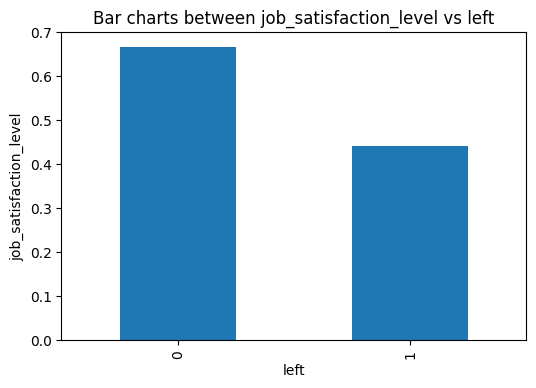

In [104]:
plt.figure(figsize=(6,4))
plt.title('Bar charts between job_satisfaction_level vs left')
plt.xlabel('left')
plt.ylabel('job_satisfaction_level')
df_ml.groupby('left')['job_satisfaction_level'].mean().plot.bar()

In [105]:
#Average salary satisfaction level
df_ml.groupby('left', as_index=False)['salary'].mean()

,left,salary
0,0,1.347742
1,1,1.345842


<Axes: title={'center': 'Bar charts between salary_satisfaction_level vs left'}, xlabel='left', ylabel='salary'>

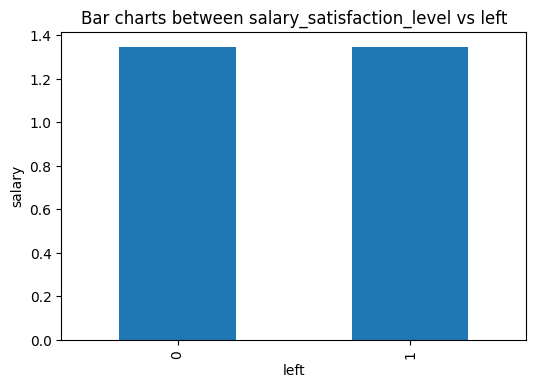

In [106]:
plt.figure(figsize=(6,4))
plt.title('Bar charts between salary_satisfaction_level vs left')
plt.xlabel('left')
plt.ylabel('salary')
df_ml.groupby('left')['salary'].mean().plot.bar()

In [107]:
#Average years_spent_with_company FAU bank
df_ml.groupby('left', as_index=False)['years_spent_with_company'].mean()

,left,years_spent_with_company
0,0,3.380032
1,1,3.876505


<Axes: title={'center': 'Bar charts between years_spent_with_company vs left'}, xlabel='left', ylabel='years_spent_with_company'>

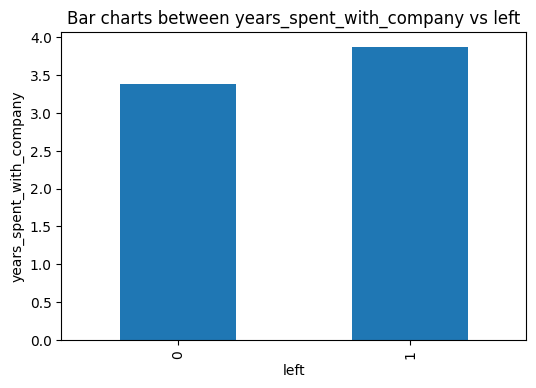

In [108]:
plt.figure(figsize=(6,4))
plt.title('Bar charts between years_spent_with_company vs left')
plt.xlabel('left')
plt.ylabel('years_spent_with_company')
df_ml.groupby('left')['years_spent_with_company'].mean().plot.bar()

In [109]:
# Build a correlation matrix 
corr=df_ml.corr()
corr

,job_role,salary,job_satisfaction_level,engagement_with_task,last_performance_evaluation,completed_projects,average_working_hours_monthly,years_spent_with_company,received_support,left,promotion_last_5years
job_role,1.000000,0.037971,0.003453,0.003634,0.003055,0.008510,0.003619,-0.046793,0.002932,0.024658,-0.039052
salary,0.037971,1.000000,0.011754,0.002576,0.013965,0.009672,0.007082,-0.003086,-0.002506,-0.001294,-0.001318
job_satisfaction_level,0.003453,0.011754,1.000000,-0.011563,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
engagement_with_task,0.003634,0.002576,-0.011563,1.000000,-0.003407,-0.012387,0.003067,-0.001676,-0.001035,0.011749,-0.010109
last_performance_evaluation,0.003055,0.013965,0.105021,-0.003407,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
completed_projects,0.008510,0.009672,-0.142970,-0.012387,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_working_hours_monthly,0.003619,0.007082,-0.020048,0.003067,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
years_spent_with_company,-0.046793,-0.003086,-0.100866,-0.001676,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
received_support,0.002932,-0.002506,0.058697,-0.001035,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,0.024658,-0.001294,-0.388375,0.011749,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788


In [110]:
# Find which attributes are more correlated with 'left'
corr["left"]

job_role                         0.024658
salary                          -0.001294
job_satisfaction_level          -0.388375
engagement_with_task             0.011749
last_performance_evaluation      0.006567
completed_projects               0.023787
average_working_hours_monthly    0.071287
years_spent_with_company         0.144822
received_support                -0.154622
left                             1.000000
promotion_last_5years           -0.061788
Name: left, dtype: float64

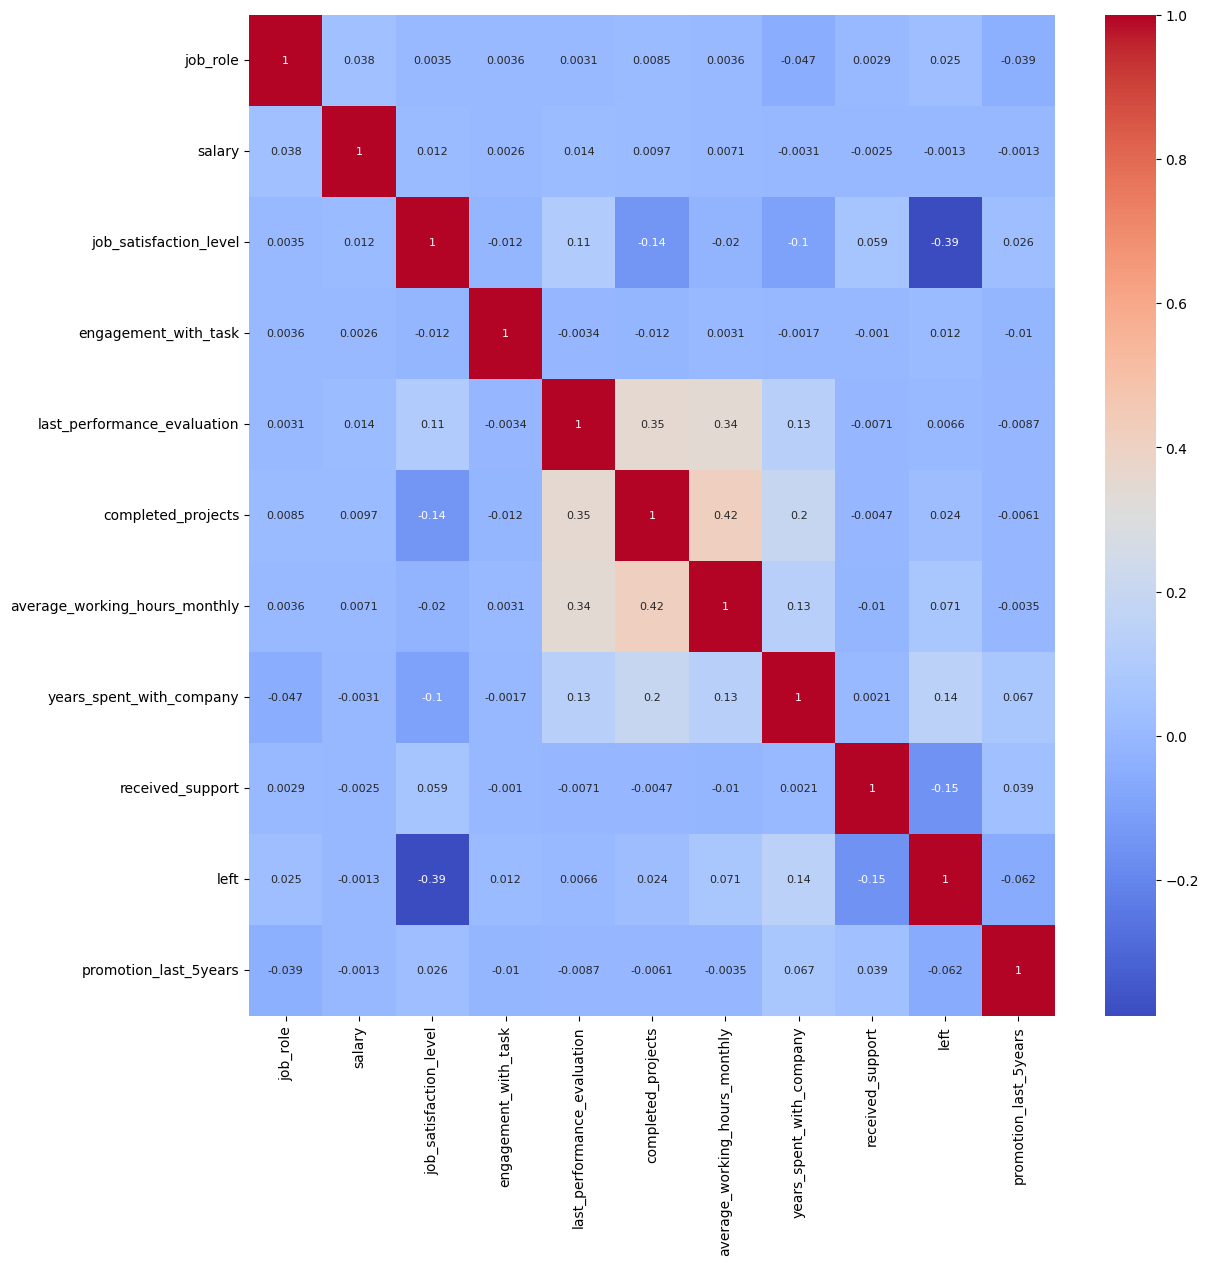

In [111]:
#Show the correlation matrix in Heatmap
corr=df_ml.corr()
plt.figure(figsize=(13,13))
hx=sns.heatmap(corr,annot=True,annot_kws={'size':8},cmap='coolwarm')
fig1=hx.figure
fig1.savefig("corr heatmap.png")

## Define the dependent variable (y) and the independent variable (x). 

In [112]:
x = df_ml.drop(['left'], axis=1)
y = df_ml['left']

## Split the dataset in training set and test set
We have to divide our dataset to the training set and test set so that we can firstly train our model and then test how it works. 
We set the test size to be 30% so training set would 70%.
To do that we would need the "train_test_split" function from sklearn.model_selection. So let's import the function and split the dataset.

In [113]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [114]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
ml =RandomForestClassifier()
ml.fit(x_train, y_train)

RandomForestClassifier()

In [115]:
y_pred = ml.predict(x_test)
predicted_value = ml.predict([[7,1,0.38,0.19,0.53,2,157,3,0,0]])
actual_value = df_ml.loc[0,'left']

print(predicted_value, actual_value)

[1] 1


C:\Users\Sayedur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [116]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9173520601877361

In [117]:
pred_y_df = pd.DataFrame({'y_act': y_test, 'y_pred': y_pred, 'Difference': y_test - y_pred})
pred_y_df[0:5]

,y_act,y_pred,Difference
1670,1,1,0
13378,0,0,0
10233,0,0,0
4719,0,0,0
7003,0,0,0


Text(0.5, 1.0, 'Actual vs. Predicted')

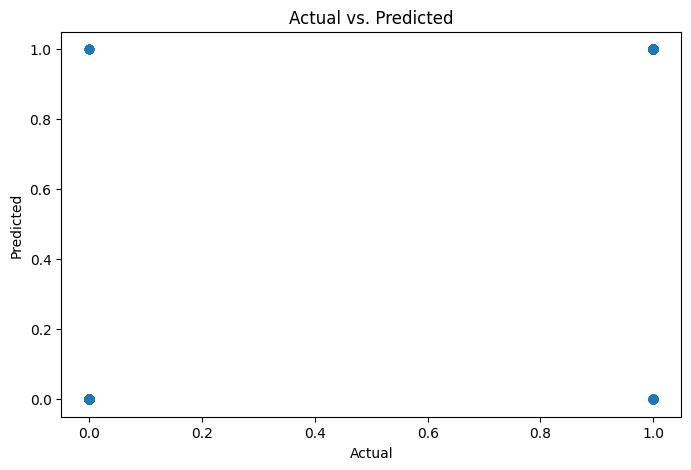

In [118]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

In [123]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[3453,    9],
       [  57,  981]], dtype=int64)

In [122]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
print('Accuracy score for RandomForest:',accuracy_score(y_test,y_pred))

Accuracy score for RandomForest: 0.9853333333333333


In [121]:
from sklearn.metrics import classification_report
Evaluation=classification_report(y_test,y_pred)
print(Evaluation)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3462
           1       0.99      0.95      0.97      1038

    accuracy                           0.99      4500
   macro avg       0.99      0.97      0.98      4500
weighted avg       0.99      0.99      0.99      4500



In [124]:
import statsmodels.api as sm
model = sm.OLS(y, x).fit()
print(model.summary2())

                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.367     
Dependent Variable:     left             AIC:                         14185.2887
Date:                   2024-07-10 01:32 BIC:                         14261.4461
No. Observations:       14999            Log-Likelihood:              -7082.6   
Df Model:               10               F-statistic:                 871.5     
Df Residuals:           14989            Prob (F-statistic):          0.00      
R-squared (uncentered): 0.368            Scale:                       0.15065   
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------------------
job_role                         0.0112   0.0011  10.5337 0.0000  0.0091  0.0133
salary                           0.0315   0.0049   6.